# Applying Preprocessing Techniques on Diabetes Dataset

###### In this notebook, we will be implementing preprocessing techniques on Diabetes Dataset

In [96]:
#Import necessary libariries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt 
import seaborn as sns
import missingno as msno

from sklearn.preprocessing import MinMaxScaler

from sklearn.cluster import KMeans 

###### Diabetes Dataset

In [97]:
#Reading the csv file
df = pd.read_csv("D:/STUDY/DATA/diabetes.csv")

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [98]:
df.shape

(2000, 9)

#### Data Preprocessing

In [99]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [100]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [101]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [102]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,2000.0,3.70350,3.306063,0.000,1.000,3.000,6.000,17.00
Glucose,2000.0,121.18250,32.068636,0.000,99.000,117.000,141.000,199.00
BloodPressure,2000.0,69.14550,19.188315,0.000,63.500,72.000,80.000,122.00
SkinThickness,2000.0,20.93500,16.103243,0.000,0.000,23.000,32.000,110.00
Insulin,2000.0,80.25400,111.180534,0.000,0.000,40.000,130.000,744.00
BMI,2000.0,32.19300,8.149901,0.000,27.375,32.300,36.800,80.60
DiabetesPedigreeFunction,2000.0,0.47093,0.323553,0.078,0.244,0.376,0.624,2.42
Age,2000.0,33.09050,11.786423,21.000,24.000,29.000,40.000,81.00
Outcome,2000.0,0.34200,0.474498,0.000,0.000,0.000,1.000,1.00


In [103]:
d = df.iloc[:,:-1]

col = d.columns

col

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

###### Null Handling

In [104]:
num_cols_miss = [i for i in col if i != "Pregnancies"]
for i in num_cols_miss:
    df[i] = df.apply(lambda x: np.nan if x[i] == 0 else x[i], axis=1)

In [105]:
df.isnull().sum()

Pregnancies                   0
Glucose                      13
BloodPressure                90
SkinThickness               573
Insulin                     956
BMI                          28
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

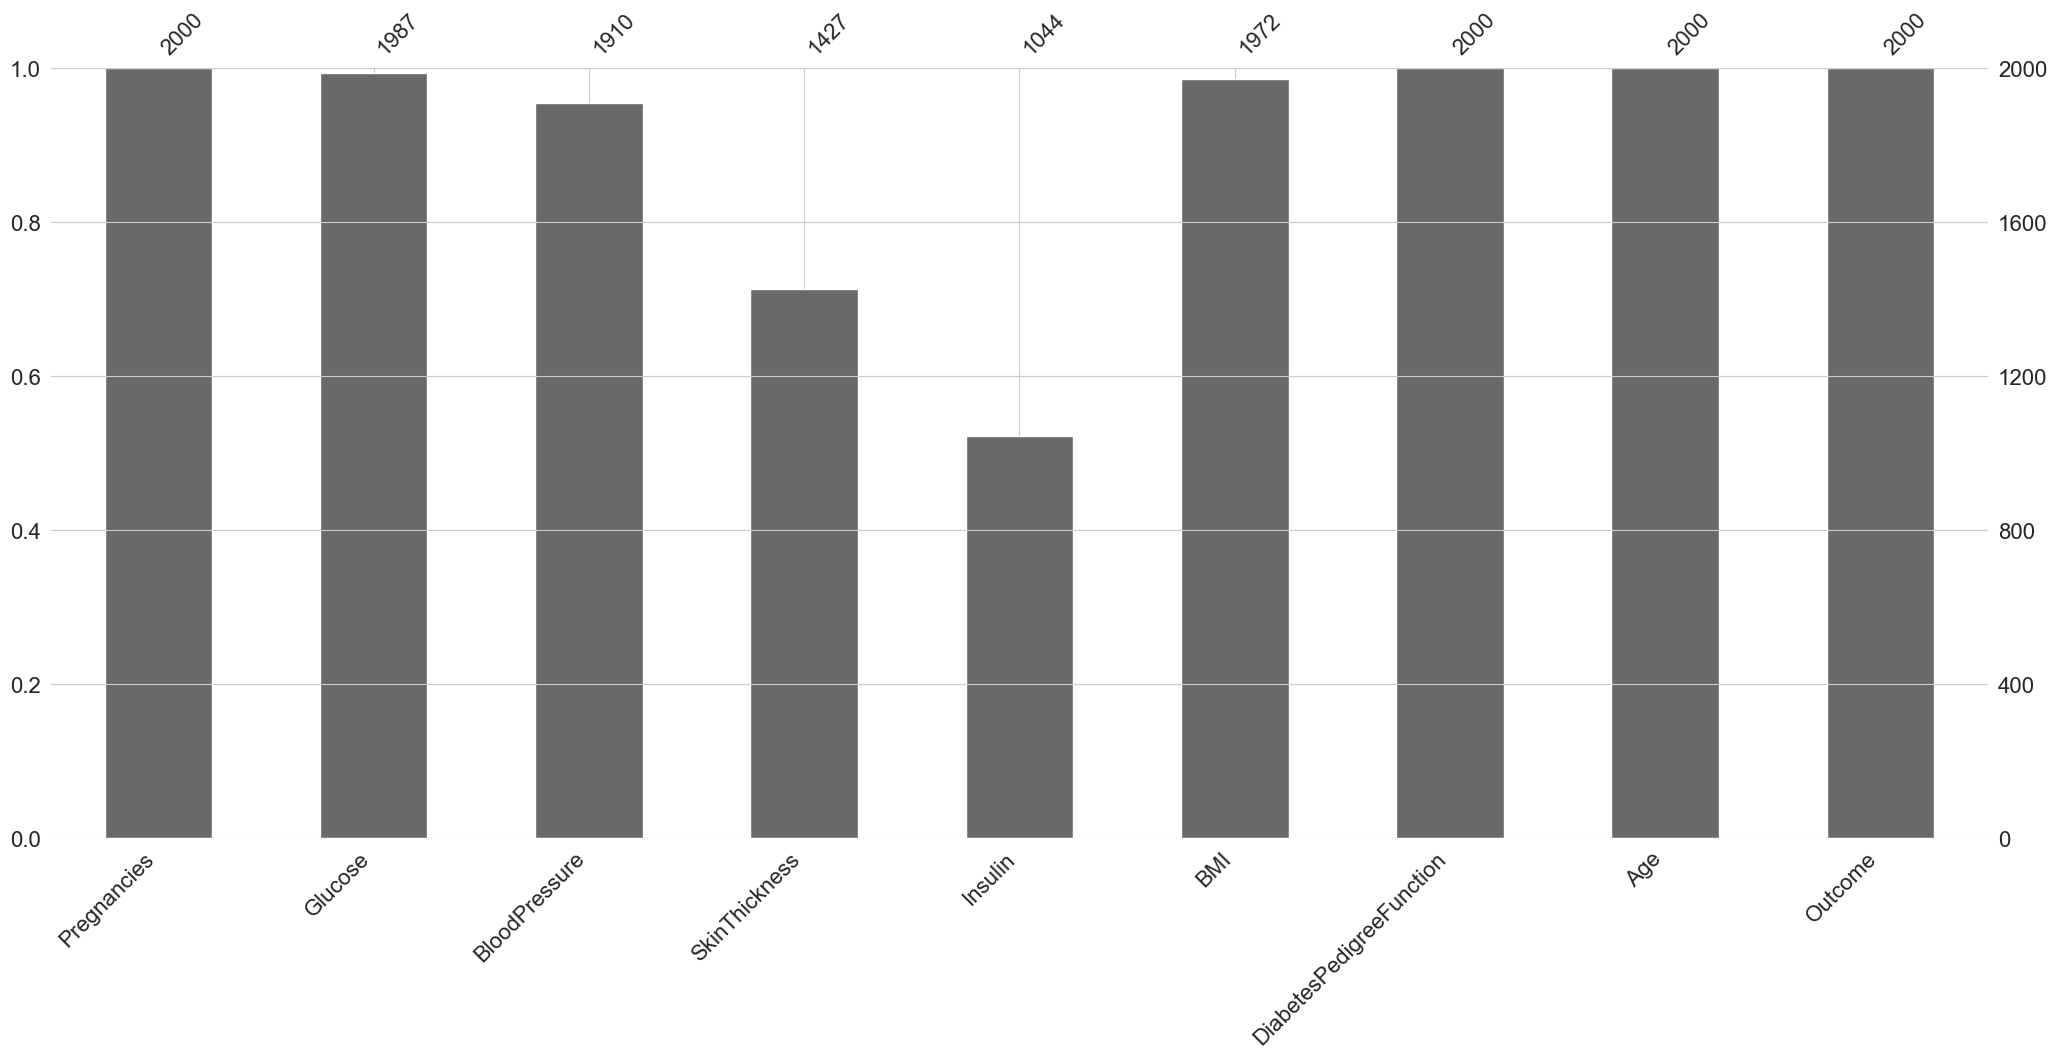

In [106]:
msno.bar(df)
plt.show()

In [107]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138.0,62.0,35.0,NaN,33.6,0.127,47.0,1
1,0,84.0,82.0,31.0,125.0,38.2,0.233,23.0,0
2,0,145.0,NaN,NaN,NaN,44.2,0.630,31.0,1
3,0,135.0,68.0,42.0,250.0,42.3,0.365,24.0,1
4,1,139.0,62.0,41.0,480.0,40.7,0.536,21.0,0


In [108]:
df[num_cols_miss] = df[num_cols_miss].apply(lambda x: x.fillna(x.median()) if x.dtype != "O" else x, axis=0)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138.0,62.0,35.0,126.0,33.6,0.127,47.0,1
1,0,84.0,82.0,31.0,125.0,38.2,0.233,23.0,0
2,0,145.0,72.0,29.0,126.0,44.2,0.630,31.0,1
3,0,135.0,68.0,42.0,250.0,42.3,0.365,24.0,1
4,1,139.0,62.0,41.0,480.0,40.7,0.536,21.0,0


In [109]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

###### Outlier Handling

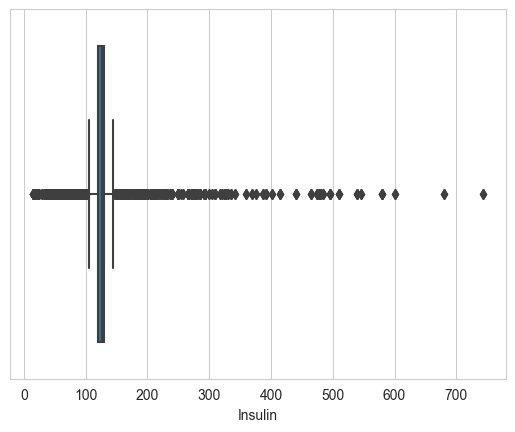

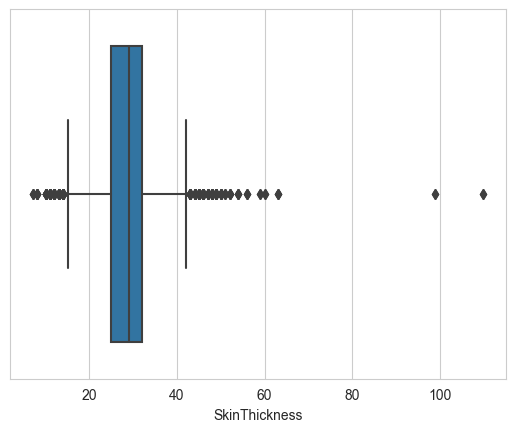

In [110]:
sns.boxplot(x=df["Insulin"])
plt.show()

sns.boxplot(x=df["SkinThickness"])
plt.show()

In [111]:
def outlier_thresholds(dataframe, col_name, q1=0.25, q3=0.75):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

In [112]:
for i in col:
    print("Thresholds of {} : ({:.2f}, {:.2f})".format(i, *outlier_thresholds(df,i)))

Thresholds of Pregnancies : (-6.50, 13.50)
Thresholds of Glucose : (36.00, 204.00)
Thresholds of BloodPressure : (40.00, 104.00)
Thresholds of SkinThickness : (14.50, 42.50)
Thresholds of Insulin : (105.00, 145.00)
Thresholds of BMI : (13.80, 50.60)
Thresholds of DiabetesPedigreeFunction : (-0.33, 1.19)
Thresholds of Age : (0.00, 64.00)


In [113]:
def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

In [114]:
for col in col:
    replace_with_thresholds(df, col)

In [115]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,2000.0,3.695000,3.277476,0.000,1.000,3.000,6.000,13.500
Glucose,2000.0,121.943000,30.535733,44.000,99.000,117.000,141.000,199.000
BloodPressure,2000.0,72.337500,11.583293,40.000,64.000,72.000,80.000,104.000
SkinThickness,2000.0,28.933250,7.486835,14.500,25.000,29.000,32.000,42.500
Insulin,2000.0,125.565500,13.512735,105.000,120.000,126.000,130.000,145.000
BMI,2000.0,32.535250,6.778333,18.200,27.600,32.400,36.800,50.600
DiabetesPedigreeFunction,2000.0,0.459723,0.284263,0.078,0.244,0.376,0.624,1.194
Age,2000.0,32.992000,11.491822,21.000,24.000,29.000,40.000,64.000
Outcome,2000.0,0.342000,0.474498,0.000,0.000,0.000,1.000,1.000


In [116]:
df.to_csv(r'D:/STUDY/DATA/diabetes_preprocessed.csv', index=False)